In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('../../data/08.Regression_for_hyperparameters/Best_models_by_ST098_and_LL_validation_summaries_with_range_stats.csv')
data = data.groupby('sp').first().reset_index(drop=False)

# import re
# pat = re.compile(r'ent(?P<ent>[\d\.e-]+)_dist(?P<dist>[\d\.e-]+)_pow(?P<pow>[\d\.e-]+).hdf5')

# ents, dists, pows = [], [], []
# for fn in data['model'].values:
#     m = pat.search(fn)
#     if not m:
#         continue
#     ents.append(float(m.group('ent')))
#     dists.append(float(m.group('dist')))
#     pows.append(float(m.group('pow')))

# data['ent'] = ents
# data['dist'] = dists
# data['pow'] = pows



In [6]:
data.ORDER1_eBird.unique()


array(['Passeriformes', 'Charadriiformes', 'Falconiformes',
       'Anseriformes', 'Pelecaniformes', 'Caprimulgiformes',
       'Accipitriformes', 'Strigiformes', 'Gruiformes', 'Gaviiformes',
       'Suliformes', 'Columbiformes', 'Piciformes', 'Cathartiformes'],
      dtype=object)

In [36]:
data.training_n_intervals

0        77
1        45
2       164
3      2144
4      2299
       ... 
148     268
149     119
150      59
151    1905
152    1927
Name: training_n_intervals, Length: 153, dtype: int64

## Gourp by order?

In [3]:
sum_ = data['ent'] + data['dist']
data['ent'] = data['ent']/sum_
data['dist'] = data['dist']/sum_
# Because the ent + dist chanegs for the relative weight of obs, and the weight obs is simply for matching the S&T distribution, we might 
# need to normalize it.

In [4]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
print('Order clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['ORDER1_eBird']]))
print('Family clustering silhouette score', silhouette_score(StandardScaler().fit_transform(data[['ent','dist','pow']]), data[['FAMILY1_eBird']]))
print('Family clustering silhouette score (passerine only)', silhouette_score(StandardScaler().fit_transform(
    data[data['ORDER1_eBird']=='Passeriformes'][['ent','dist','pow']]), 
    data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))

print('======== for each hyperparameter =======')
for hyperparam in ['ent', 'dist', 'pow']:
    print(f'Order clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['ORDER1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam})', silhouette_score(StandardScaler().fit_transform(data[[hyperparam]]), data[['FAMILY1_eBird']]))
    print(f'Family clustering silhouette score (for {hyperparam}) (passerine only)', silhouette_score(StandardScaler().fit_transform(
        data[data['ORDER1_eBird']=='Passeriformes'][[hyperparam]]), 
        data[data['ORDER1_eBird']=='Passeriformes'][['FAMILY1_eBird']]))


Order clustering silhouette score -0.6339071332793684
Family clustering silhouette score -0.768890761851107
Family clustering silhouette score (passerine only) -0.752346388563049
======== for each hyperparameter =======
Order clustering silhouette score (for ent) -0.8185095396489731
Family clustering silhouette score (for ent) -0.86928104559943
Family clustering silhouette score (for ent) (passerine only) -0.8899949770193548
Order clustering silhouette score (for dist) -0.8185095396974837
Family clustering silhouette score (for dist) -0.869281045751634
Family clustering silhouette score (for dist) (passerine only) -0.8899949770194112
Order clustering silhouette score (for pow) -0.7192533365352383
Family clustering silhouette score (for pow) -0.802836235983118
Family clustering silhouette score (for pow) (passerine only) -0.8442264166016072


/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/yc85_illinois_edu/micromamba/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y 

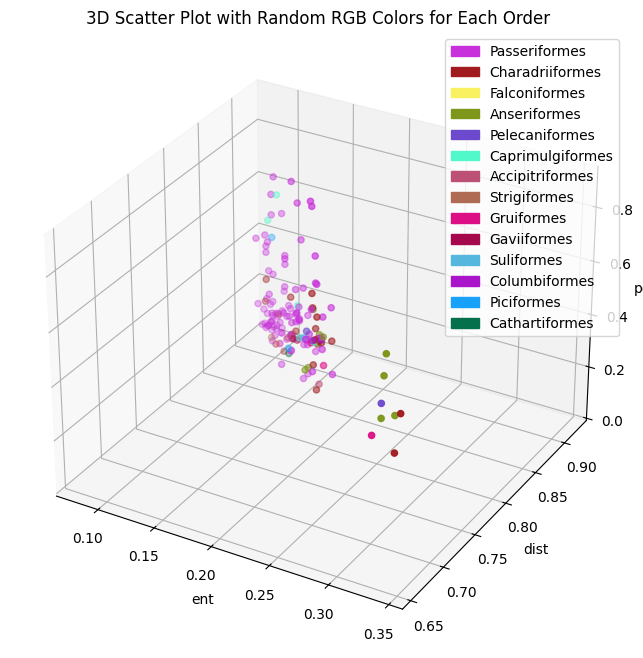

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['ORDER1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['ORDER1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1, 1))

plt.show()

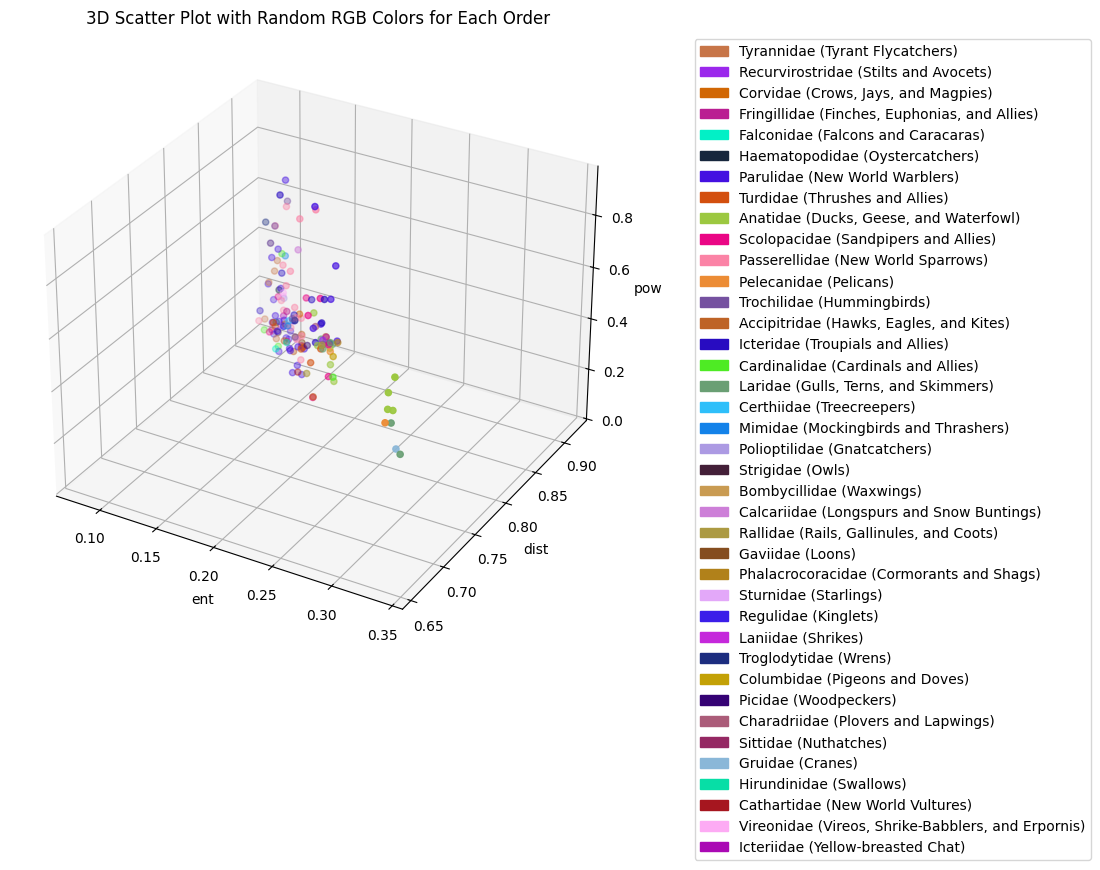

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Example: create some jittered x and y data and use 'pow' for z
x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0])
y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0])
z = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0])

# Get unique orders from the categorical column.
unique_orders = data['FAMILY1_eBird'].unique()

# Create a mapping from each order to a random RGB color.
# Each color is a tuple of 3 numbers (red, green, blue) between 0 and 1.
order_random_map = {order: tuple(np.random.rand(3)) for order in unique_orders}

# Map the random colors back to each row in the DataFrame based on the order.
colors = data['FAMILY1_eBird'].map(order_random_map)

# Create the 3D scatter plot.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('ent')
ax.set_ylabel('dist')
ax.set_zlabel('pow')
ax.set_title("3D Scatter Plot with Random RGB Colors for Each Order")

# Optionally, add a legend to display which color corresponds to each order.
import matplotlib.patches as mpatches
legend_handles = [mpatches.Patch(color=order_random_map[order], label=order) 
                  for order in order_random_map]
ax.legend(handles=legend_handles, bbox_to_anchor=(1.1, 1))

plt.show()

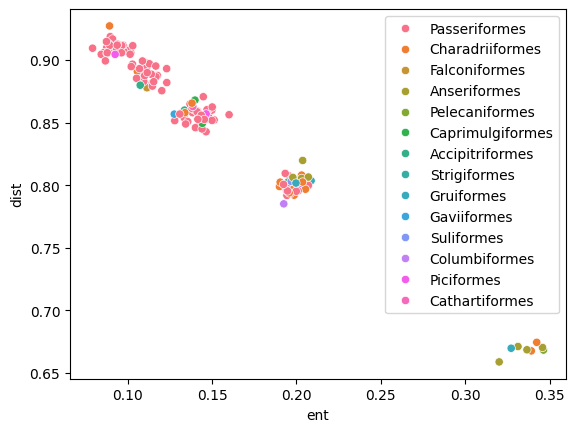

In [7]:
sns.scatterplot(
    x = data['ent'] + np.random.normal(0, np.std(data['ent'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


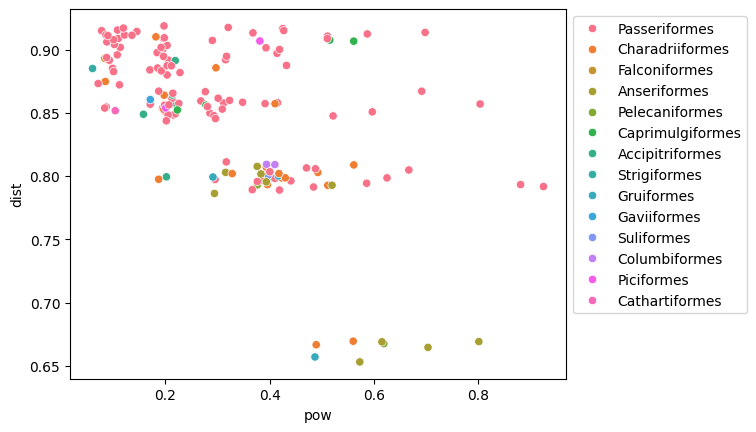

In [8]:
sns.scatterplot(
    x = data['pow'] + np.random.normal(0, np.std(data['pow'])/10, size=data.shape[0]),
    y = data['dist'] + np.random.normal(0, np.std(data['dist'])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))


## PCA

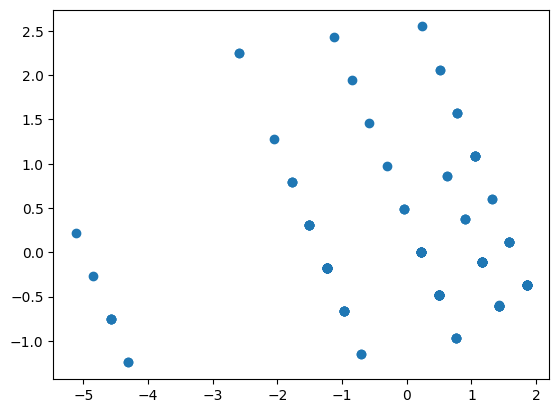

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2).fit(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
pca.explained_variance_ratio_
res = pca.transform(StandardScaler().fit_transform(data[['dist', 'pow', 'ent']]))
plt.scatter(res[:,0], res[:,1])


In [10]:
import sklearn
sklearn.__version__

'1.6.1'

In [11]:
data['common_name'].unique()

array(['Acadian Flycatcher', 'American Avocet', 'American Crow',
       'American Goldfinch', 'American Kestrel', 'American Oystercatcher',
       'American Redstart', 'American Robin', 'American Wigeon',
       'American Woodcock', 'American Tree Sparrow',
       'American White Pelican', "Anna's Hummingbird",
       'Bay-breasted Warbler', 'Bald Eagle', 'Baltimore Oriole',
       'Black-and-white Warbler', 'Blackburnian Warbler',
       'Black-chinned Hummingbird', 'Black-headed Grosbeak',
       'Black Skimmer', 'Blue Jay', 'Brown-headed Cowbird',
       'Broad-billed Hummingbird', 'Brown Creeper', 'Brown Pelican',
       'Brown Thrasher', 'Broad-winged Hawk',
       'Black-throated Blue Warbler', 'Black-throated Green Warbler',
       'Blue-gray Gnatcatcher', "Bullock's Oriole", 'Burrowing Owl',
       'Blue-winged Teal', 'California Gull', 'Cape May Warbler',
       'Canada Goose', 'Canvasback', 'Canada Warbler', 'Cedar Waxwing',
       'Cerulean Warbler', 'Chestnut-collared Longs

In [12]:
print(pca.explained_variance_ratio_)
print(pca.components_)

[0.81463666 0.18536334]
[[ 0.61840754 -0.48491673 -0.61840754]
 [ 0.34288791  0.87456033 -0.34288791]]


high dist, low pow, low ent

high dist, high pow, low ent

Text(0, 0.5, 'PC2')

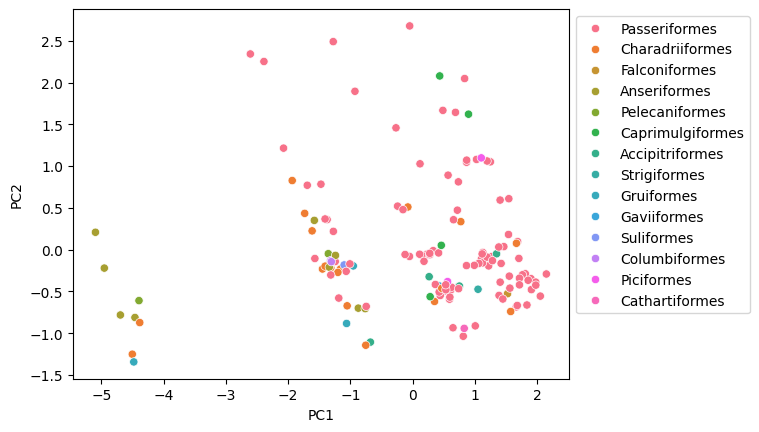

In [13]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['ORDER1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

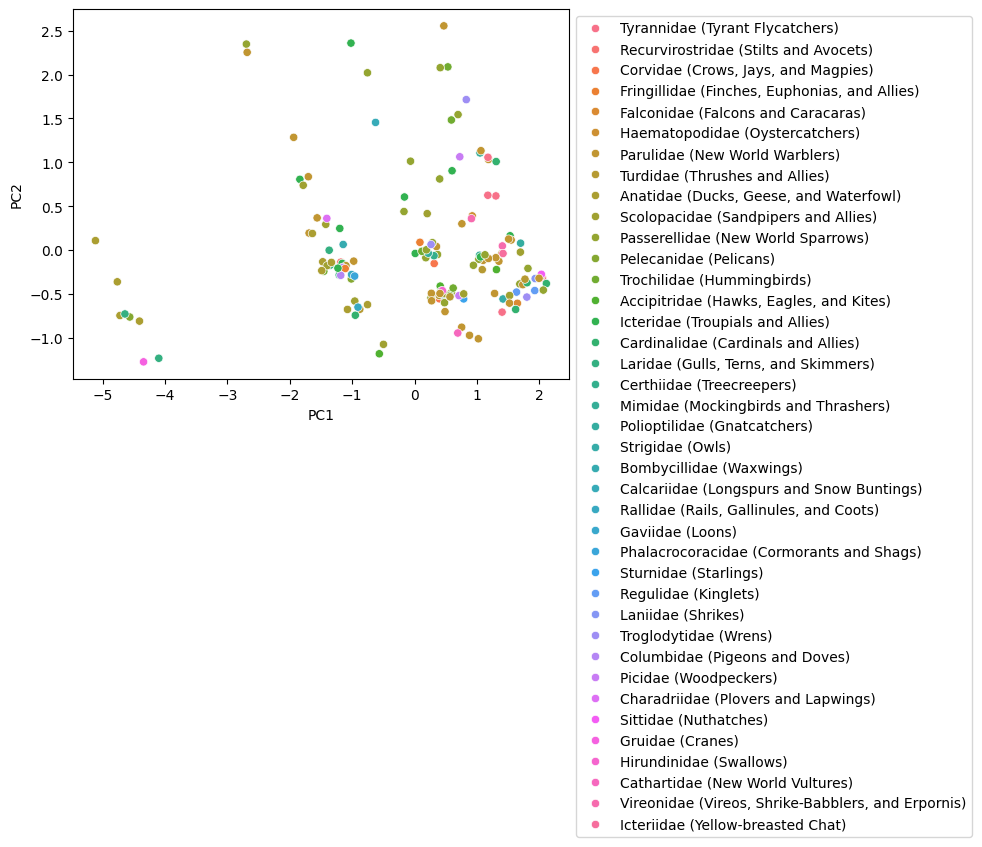

In [14]:
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/10, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/10, size=data.shape[0]),
    hue = data['FAMILY1_eBird']
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')

In [15]:
data['PC1'] = res[:,0]
data['PC2'] = res[:,1]

In [16]:
data[data['PC2']>=3]

,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,mean_dist_cor,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2


Text(0, 0.5, 'PC2')

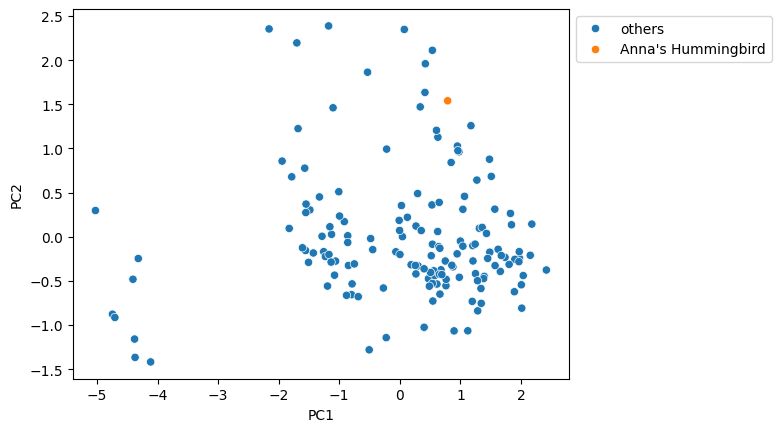

In [17]:
the_name = lambda x:"Anna's Hummingbird" if x=="Anna's Hummingbird" else "others"
sns.scatterplot(
    x = res[:,0] + np.random.normal(0, np.std(res[:,0])/5, size=data.shape[0]),
    y = res[:,1] + np.random.normal(0, np.std(res[:,1])/5, size=data.shape[0]),
    hue = [the_name(i) for i in data['common_name'].values]
)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('PC1')
plt.ylabel('PC2')


# RandomForest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from scipy.stats import pearsonr

In [19]:
OneHotEncoder().fit_transform(data[['ORDER1_eBird']]).toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(153, 14))

(array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1.]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ]),
 <BarContainer object of 10 artists>)

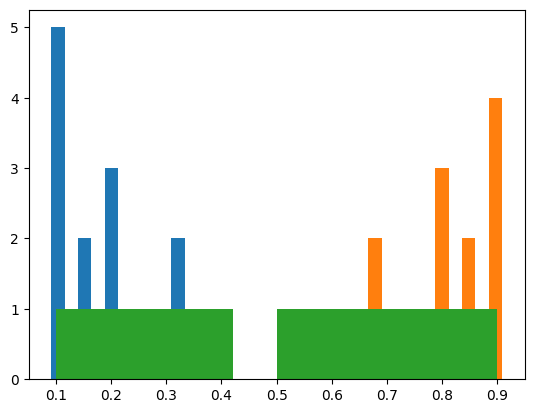

In [20]:
plt.hist(data['ent'].unique())
plt.hist(data['dist'].unique())
plt.hist(data['pow'].unique())

In [21]:
data

,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,mean_dist_cor,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,acafly,1,Acadian Flycatcher,ST098_and_LL,acafly_2023_150km_obs1.0_ent0.005848_dist0.046...,1.752348,1.911949,0.393953,0.472690,244.959987,245.028891,129.128675,135.253306,0.348158,0.416388,0.692503,0.666667,0.988049,0.910361,0.04,63190.270925,0.924506,0.01,1432.784654,0.911731,0.13,59571.973590,0.906630,0.02,2189.491915,77,0.111111,0.888889,0.1,obs1.0_ent0.005848_dist0.046784_pow0.1,23,0,54,6,0,27,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [37]:
# var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
# 'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
#  'nonbreeding_lon_c',
#  'nonbreeding_lat_c',
#  'nonbreeding_lat_max',
#  'nonbreeding_lat_min',
#  'nonbreeding_lon_max',
#  'nonbreeding_lon_min',
#  'nonbreeding_range_size',
#  'nonbreeding_abundance_variation',
#  'prebreeding_lon_c',
#  'prebreeding_lat_c',
#  'prebreeding_lat_max',
#  'prebreeding_lat_min',
#  'prebreeding_lon_max',
#  'prebreeding_lon_min',
#  'prebreeding_range_size',
#  'prebreeding_abundance_variation',
#  'breeding_lon_c',
#  'breeding_lat_c',
#  'breeding_lat_max',
#  'breeding_lat_min',
#  'breeding_lon_max',
#  'breeding_lon_min',
#  'breeding_range_size',
#  'breeding_abundance_variation',
#  'postbreeding_lon_c',
#  'postbreeding_lat_c',
#  'postbreeding_lat_max',
#  'postbreeding_lat_min',
#  'postbreeding_lon_max',
#  'postbreeding_lon_min',
#  'postbreeding_range_size',
#  'postbreeding_abundance_variation']
# X = data[var_].fillna(-999)

# def pearson_corr(y_true, y_pred):
#     return pearsonr(y_true, y_pred)[0]
# pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

# ###
# metircs = []
# for y_name in ['ent','dist','pow']:
#     y = data[y_name].fillna(-999)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#     model = RandomForestRegressor(n_estimators=100, oob_score=True)
#     param_grid = {
#         'n_estimators': [50, 100, 200, 300],
#         'max_depth':    [None, 2, 5, 10, 20],
#         'min_samples_split': [2, 5, 10, 20]
#     }
#     grid = GridSearchCV(
#         estimator=RandomForestRegressor(random_state=42),
#         param_grid=param_grid,
#         cv=5, 
#         scoring='r2', 
#         n_jobs=1, 
#         return_train_score=True
#     )
#     grid.fit(X_train, y_train)
#     print("Best hyperparameters:", grid.best_params_)
#     print("Best CV R² score     :", grid.best_score_)
#     best_model = grid.best_estimator_

#     pred_test = best_model.predict(X_test)
#     pred_train = best_model.predict(X_train)
#     train_y_true_y_pred_df = pd.DataFrame({'y_train':y_train, 'y_train_pred':pred_train})
#     test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
#     train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
#     test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)

#     print(
#         'Param: ', y_name,
#         '\n',
#         r2_score(y_test.values, pred_test),
#         '\n',
#         pearsonr(y_test.values, pred_test),
#         '\n',
#         spearmanr(y_test.values, pred_test),
#     )

#     best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

#     metircs.append({'hyperparameter':y_name,
#                     **grid.best_params_, 
#                     'CV':5, 
#                     'Best_model_CV_R2':grid.best_score_,
#                     'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
#                     'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
#                     'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
#                     'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
#                     'r2_train':r2_score(y_train.values, pred_train),
#                     'pearsonr_train':pearsonr(y_train.values, pred_train)[0],
#                     'pearsonr_p_train':pearsonr(y_train.values, pred_train)[1],
#                     'spearmanr_train':spearmanr(y_train.values, pred_train)[0],
#                     'spearmanr_p_train':spearmanr(y_train.values, pred_train)[1],
#                     'r2_test':r2_score(y_test.values, pred_test),
#                     'pearsonr_test':pearsonr(y_test.values, pred_test)[0],
#                     'pearsonr_p_test':pearsonr(y_test.values, pred_test)[1],
#                     'spearmanr_test':spearmanr(y_test.values, pred_test)[0],
#                     'spearmanr_p_test':spearmanr(y_test.values, pred_test)[1],
#                     })

#     print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
#     feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
#     feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

#     ## plot y_true vsd y_pred
#     plt.scatter(
#         y_test.values, pred_test
#     )
#     plt.plot([np.min(y_test.values), np.max(y_test.values)],
#             [np.min(y_test.values), np.max(y_test.values)], color='red')
#     plt.show()

#     print()

# metircs = pd.DataFrame(metircs)
# metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 100}
Best CV R² score     : 0.2931252421073025
Param:  ent 
 0.6642547996523734 
 PearsonRResult(statistic=np.float64(0.8333709973297432), pvalue=np.float64(1.016778072293355e-40)) 
 SignificanceResult(statistic=np.float64(0.8249008459632873), pvalue=np.float64(3.058570387155721e-39))
[('Mass', np.float64(0.20785058094476452)), ('Kipps_Distance', np.float64(0.1519875662972599)), ('Hand.Wing_Index', np.float64(0.12787946435067937)), ('Beak_Length_Culmen', np.float64(0.11327878442500067)), ('Beak_Width', np.float64(0.06018709567453457)), ('nonbreeding_abundance_variation', np.float64(0.030997232591433777)), ('postbreeding_lat_c', np.float64(0.02424656491969555)), ('breeding_lon_max', np.float64(0.02211145711592152)), ('Wing_Length', np.float64(0.018349919790364967)), ('Tarsus_Length', np.float64(0.017900546884804084)), ('postbreeding_lat_max', np.float64(0.01777054856789473)), ('Beak_Depth', np.float64(0.017

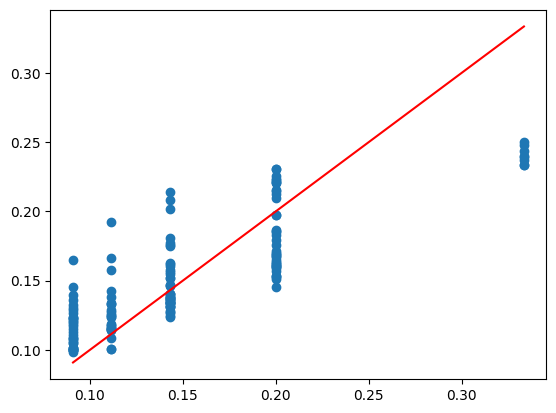


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 100}
Best CV R² score     : 0.29533346620658313
Param:  dist 
 0.6641563632656937 
 PearsonRResult(statistic=np.float64(0.8331652910714131), pvalue=np.float64(1.1068941309905877e-40)) 
 SignificanceResult(statistic=np.float64(0.8237227354597939), pvalue=np.float64(4.8398053118389796e-39))
[('Mass', np.float64(0.20932271294364355)), ('Kipps_Distance', np.float64(0.1517189916957593)), ('Hand.Wing_Index', np.float64(0.12760753477818076)), ('Beak_Length_Culmen', np.float64(0.11584998143977022)), ('Beak_Width', np.float64(0.05963440331834655)), ('nonbreeding_abundance_variation', np.float64(0.028594059853740365)), ('postbreeding_lat_c', np.float64(0.023763343768509436)), ('breeding_lon_max', np.float64(0.02219736017444312)), ('postbreeding_lat_max', np.float64(0.019824133359184322)), ('Wing_Length', np.float64(0.01923984763213829)), ('Beak_Depth', np.float64(0.017530261644525643)), ('breeding_lat_max', np.floa

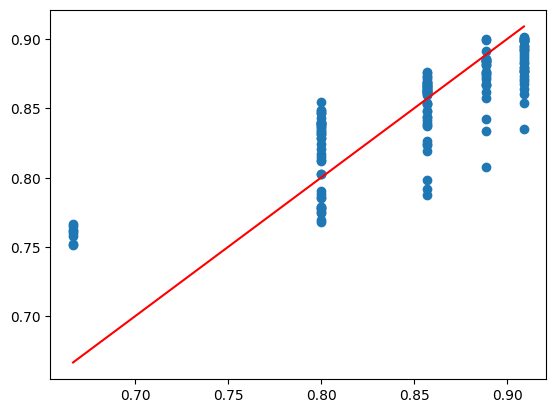


Best hyperparameters: {'max_depth': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best CV R² score     : 0.1993954891774631
Param:  pow 
 0.4152013711657039 
 PearsonRResult(statistic=np.float64(0.6753829877776831), pvalue=np.float64(1.0186070466982387e-21)) 
 SignificanceResult(statistic=np.float64(0.573575210752406), pvalue=np.float64(9.239375698509574e-15))
[('postbreeding_abundance_variation', np.float64(0.2033043395825712)), ('nonbreeding_abundance_variation', np.float64(0.12368626870788502)), ('Hand.Wing_Index', np.float64(0.09717744851940266)), ('postbreeding_range_size', np.float64(0.07732123657241446)), ('nonbreeding_range_size', np.float64(0.07389871972736656)), ('Beak_Width', np.float64(0.06730884653263265)), ('Beak_Length_Culmen', np.float64(0.06623276393619537)), ('prebreeding_abundance_variation', np.float64(0.06185456331347378)), ('breeding_range_size', np.float64(0.03030736950674152)), ('Mass', np.float64(0.029525924873997775)), ('Beak_Length_Nares', np.float64(0.027

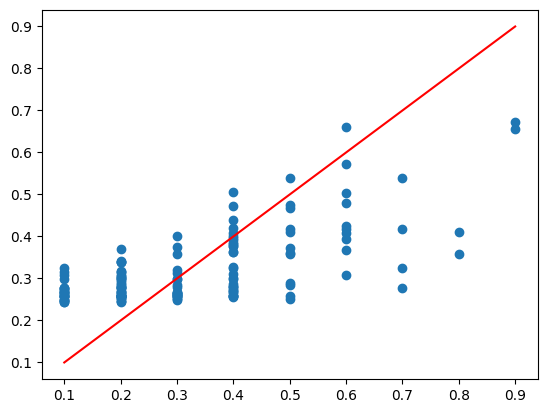

In [38]:
var_ = ['Beak_Length_Culmen', 'Beak_Length_Nares', 'Beak_Width', 'Beak_Depth', 'Tarsus_Length', 'Wing_Length', 
'Kipps_Distance', 'Secondary1', 'Hand.Wing_Index', 'Tail_Length', 'Mass', 
 'nonbreeding_lon_c',
 'nonbreeding_lat_c',
 'nonbreeding_lat_max',
 'nonbreeding_lat_min',
 'nonbreeding_lon_max',
 'nonbreeding_lon_min',
 'nonbreeding_range_size',
 'nonbreeding_abundance_variation',
 'prebreeding_lon_c',
 'prebreeding_lat_c',
 'prebreeding_lat_max',
 'prebreeding_lat_min',
 'prebreeding_lon_max',
 'prebreeding_lon_min',
 'prebreeding_range_size',
 'prebreeding_abundance_variation',
 'breeding_lon_c',
 'breeding_lat_c',
 'breeding_lat_max',
 'breeding_lat_min',
 'breeding_lon_max',
 'breeding_lon_min',
 'breeding_range_size',
 'breeding_abundance_variation',
 'postbreeding_lon_c',
 'postbreeding_lat_c',
 'postbreeding_lat_max',
 'postbreeding_lat_min',
 'postbreeding_lon_max',
 'postbreeding_lon_min',
 'postbreeding_range_size',
 'postbreeding_abundance_variation']
X = data[var_].fillna(-999)

def pearson_corr(y_true, y_pred):
    return pearsonr(y_true, y_pred)[0]
pearson_scorer = make_scorer(pearson_corr, greater_is_better=True)

###
metircs = []
for y_name in ['ent','dist','pow']:
    y = data[y_name].fillna(-999)

    model = RandomForestRegressor(n_estimators=100, oob_score=True)
    param_grid = {
        'n_estimators': [50, 100, 200, 300],
        'max_depth':    [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10, 20]
    }
    grid = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=5, 
        scoring='r2', 
        n_jobs=1, 
        return_train_score=True
    )
    grid.fit(X, y)
    print("Best hyperparameters:", grid.best_params_)
    print("Best CV R² score     :", grid.best_score_)
    best_model = grid.best_estimator_

    pred = best_model.predict(X)
    train_y_true_y_pred_df = pd.DataFrame({'y':y, 'y_pred':pred})
    # test_y_true_y_pred_df = pd.DataFrame({'y_test':y_test, 'y_test_pred':pred_test})
    # train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_true_y_pred_df_{y_name}.csv', index=False)
    # test_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/test_y_true_y_pred_df_{y_name}.csv', index=False)
    train_y_true_y_pred_df.to_csv(f'../../data/08.Regression_for_hyperparameters/train_y_cv_true_y_pred_df_{y_name}.csv', index=False)

    print(
        'Param: ', y_name,
        '\n',
        r2_score(y.values, pred),
        '\n',
        pearsonr(y.values, pred),
        '\n',
        spearmanr(y.values, pred),
    )

    best_param_index = grid.cv_results_['params'].index(grid.best_params_)
    

    metircs.append({'hyperparameter':y_name,
                    **grid.best_params_, 
                    'CV':5, 
                    'Best_model_CV_R2':grid.best_score_,
                    'Best_model_CV_R2_train_mean': grid.cv_results_['mean_train_score'][best_param_index],
                    'Best_model_CV_R2_train_std': grid.cv_results_['std_train_score'][best_param_index],
                    'Best_model_CV_R2_test_mean': grid.cv_results_['mean_test_score'][best_param_index],
                    'Best_model_CV_R2_test_std': grid.cv_results_['std_test_score'][best_param_index],
                    'r2':r2_score(y.values, pred),
                    'pearsonr':pearsonr(y.values, pred)[0],
                    'pearsonr_p':pearsonr(y.values, pred)[1],
                    'spearmanr':spearmanr(y.values, pred)[0],
                    'spearmanr_p':spearmanr(y.values, pred)[1],
                    })

    print(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]))
    feature_importances = pd.DataFrame(sorted(dict(zip(var_, best_model.feature_importances_)).items(), key=lambda x:-x[1]), columns=['feature', 'feature_importance'])
    feature_importances.to_csv(f'../../data/08.Regression_for_hyperparameters/feature_importances_{y_name}.csv', index=False)

    ## plot y_true vsd y_pred
    plt.scatter(
        y.values, pred
    )
    plt.plot([np.min(y.values), np.max(y.values)],
            [np.min(y.values), np.max(y.values)], color='red')
    plt.show()

    print()

metircs = pd.DataFrame(metircs)
metircs.to_csv(f'../../data/08.Regression_for_hyperparameters/all_metrics.csv', index=False)


In [24]:
data


,sp,Unnamed: 0,common_name,method,model,mean_ll_improvement,weighted_mean_ll_improvement,mean_win_distance_fraction,weighted_mean_win_distance_fraction,mean_win_distance,weighted_mean_win_distance,mean_energy_improvement,weighted_energy_improvement,pit_d,pit_row,pit_col,pit_in_95,mean_dist_cor,synth_routes_prebreeding_migration_straightness,synth_routes_prebreeding_migration_n_stopovers,synth_routes_prebreeding_migration_speed,synth_routes_breeding_straightness,synth_routes_breeding_n_stopovers,synth_routes_breeding_speed,synth_routes_postbreeding_migration_straightness,synth_routes_postbreeding_migration_n_stopovers,synth_routes_postbreeding_migration_speed,synth_routes_nonbreeding_straightness,synth_routes_nonbreeding_n_stopovers,synth_routes_nonbreeding_speed,training_n_intervals,ent,dist,pow,model_param,train_n_banding,train_n_tracking,train_n_motus,test_n_banding,test_n_tracking,test_n_motus,nonbreeding_quality,prebreeding_migration_quality,breeding_quality,postbreeding_migration_quality,Species2_eBird,ORDER1_eBird,FAMILY1_eBird,Species1_BirdLife,Species3_BirdTree,Beak_Length_Culmen,Beak_Length_Nares,Beak_Width,Beak_Depth,Tarsus_Length,Wing_Length,Kipps_Distance,Secondary1,Hand.Wing_Index,Tail_Length,Mass,Migration,Min_Latitude,Max_Latitude,Centroid_Latitude,Centroid_Longitude,Range_Size,Trophic_Level_Carnivore,Trophic_Level_Herbivore,Trophic_Level_Omnivore,Trophic_Level_Scavenger,Trophic_Niche_Aquatic.predator,Trophic_Niche_Frugivore,Trophic_Niche_Granivore,Trophic_Niche_Herbivore.aquatic,Trophic_Niche_Herbivore.terrestrial,Trophic_Niche_Invertivore,Trophic_Niche_Nectarivore,Trophic_Niche_Omnivore,Trophic_Niche_Scavenger,Trophic_Niche_Vertivore,Primary_Lifestyle_Aerial,Primary_Lifestyle_Aquatic,Primary_Lifestyle_Generalist,Primary_Lifestyle_Insessorial,Primary_Lifestyle_Terrestrial,Realm_Indomalayan,Realm_Palearctic,Realm_Nearctic,Realm_Afrotropical,Realm_Oceanian,Realm_Neotropical,Realm_Australasian,Realm_Antarctic,redlistCategory,populationTrend,habitat_breadth,Diet_Inv,Diet_Vend,Diet_Vect,Diet_Vfish,Diet_Vunk,Diet_Scav,Diet_Fruit,Diet_Nect,Diet_Seed,Diet_PlantO,Diet_5CatFruiNect,Diet_5CatInvertebrate,Diet_5CatOmnivore,Diet_5CatPlantSeed,Diet_5CatVertFishScav,ForStrat_watbelowsurf,ForStrat_wataroundsurf,ForStrat_ground,ForStrat_understory,ForStrat_midhigh,ForStrat_canopy,ForStrat_aerial,Diet_Breadth,ForStrat_Breadth,GenerationLength,TotalInnovations,TotalInnovations.1,TotalFoodTypeInnovations,TotalTechnicalInnovations,InnovationYesOrNo,FoodTypeInnovationYesOrNo,TechnicalInnovationYesOrNo,BrainSize,RelativeBrainSize,nonbreeding_lon_c,nonbreeding_lat_c,nonbreeding_lat_max,nonbreeding_lat_min,nonbreeding_lon_max,nonbreeding_lon_min,nonbreeding_range_size,nonbreeding_abundance_variation,prebreeding_lon_c,prebreeding_lat_c,prebreeding_lat_max,prebreeding_lat_min,prebreeding_lon_max,prebreeding_lon_min,prebreeding_range_size,prebreeding_abundance_variation,breeding_lon_c,breeding_lat_c,breeding_lat_max,breeding_lat_min,breeding_lon_max,breeding_lon_min,breeding_range_size,breeding_abundance_variation,postbreeding_lon_c,postbreeding_lat_c,postbreeding_lat_max,postbreeding_lat_min,postbreeding_lon_max,postbreeding_lon_min,postbreeding_range_size,postbreeding_abundance_variation,PC1,PC2
0,acafly,1,Acadian Flycatcher,ST098_and_LL,acafly_2023_150km_obs1.0_ent0.005848_dist0.046...,1.752348,1.911949,0.393953,0.472690,244.959987,245.028891,129.128675,135.253306,0.348158,0.416388,0.692503,0.666667,0.988049,0.910361,0.04,63190.270925,0.924506,0.01,1432.784654,0.911731,0.13,59571.973590,0.906630,0.02,2189.491915,77,0.111111,0.888889,0.1,obs1.0_ent0.005848_dist0.046784_pow0.1,23,0,54,6,0,27,3,3,3,3,Empidonax virescens,Passeriformes,Tyrannidae (Tyrant Flycatchers),Empidonax virescens,Empidonax virescens,13.3,9.1,6.1,4.0,17.1,71.0,19.9,52.1,27.5,58.8,12.6,3.0,26.59,45.34,36.73,-87.99,3006134.68,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,3.871565,80.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

<Axes: xlabel='Mass', ylabel='ent'>

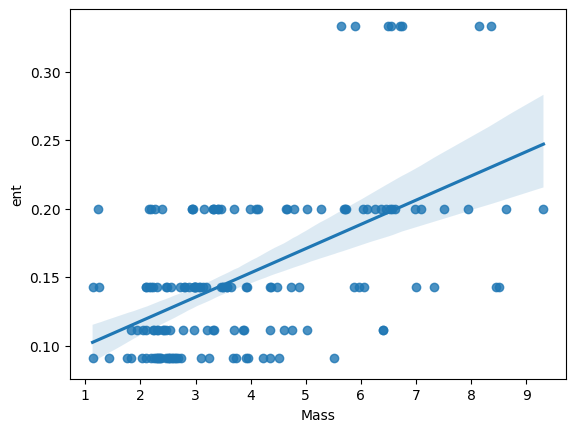

In [25]:
# plt.scatter(
#     np.log(data['Mass']),
#     data['ent']
# )

sns.regplot(
    x=np.log(data['Mass']),
    y=data['ent']
)


<Axes: xlabel='Mass', ylabel='dist'>

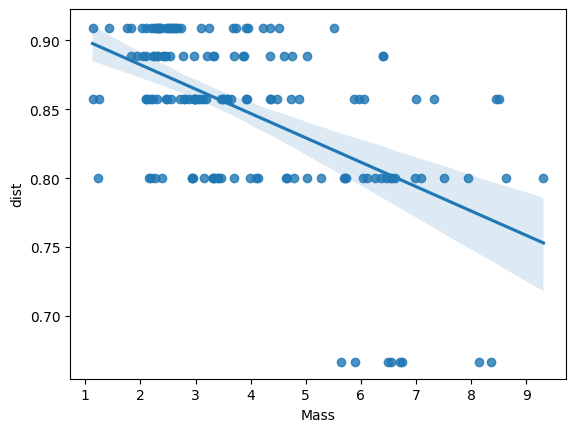

In [26]:
sns.regplot(
    x=np.log(data['Mass']),
    y=data['dist']
)


In [27]:
from scipy.stats import pearsonr
pearsonr(np.log(data['postbreeding_abundance_variation']),
        data['pow'])


PearsonRResult(statistic=np.float64(0.459417056310019), pvalue=np.float64(2.323494198411332e-09))

In [28]:
tmp = data[['Mass', 'pow']].dropna()

pearsonr(np.log(tmp['Mass']),
         tmp['pow'])


PearsonRResult(statistic=np.float64(0.19211834515967371), pvalue=np.float64(0.017355412522670716))

<Axes: xlabel='postbreeding_abundance_variation', ylabel='pow'>

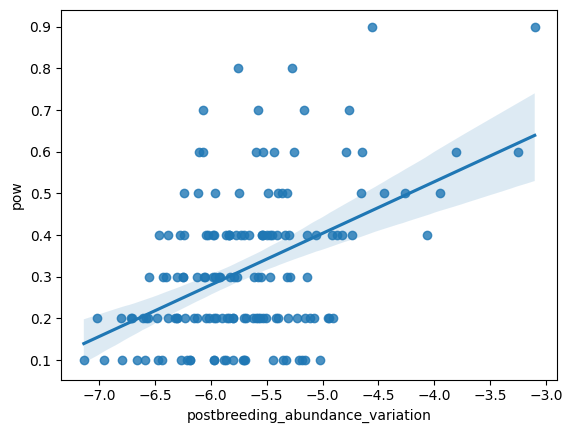

In [29]:
sns.regplot(
    x=np.log(data['postbreeding_abundance_variation']),
    y=data['pow']
)
